In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
train=pd.read_csv('diabetes.csv') #loading th dataset into the dataframe
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Values with '0' are invalid minimum values
train.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
train['Glucose'].value_counts().sort_values(ascending=False) #single value repetition

100    17
99     17
129    14
125    14
111    14
106    14
105    13
112    13
102    13
108    13
95     13
122    12
109    12
114    11
119    11
128    11
124    11
120    11
117    11
107    11
90     11
115    10
84     10
123     9
91      9
92      9
146     9
126     9
103     9
101     9
       ..
175     2
174     2
57      2
195     2
170     2
77      2
76      2
75      2
157     2
193     2
176     2
190     1
169     1
172     1
177     1
178     1
182     1
186     1
191     1
149     1
160     1
67      1
198     1
61      1
65      1
44      1
56      1
72      1
62      1
199     1
Name: Glucose, Length: 136, dtype: int64

In [5]:
train['BloodPressure'].value_counts()

70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64

In [6]:
train['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [7]:
train['Insulin'].value_counts()

0      374
105     11
140      9
130      9
120      8
100      7
94       7
180      7
110      6
115      6
135      6
66       5
49       5
56       5
76       5
210      5
90       4
88       4
125      4
71       4
200      4
155      4
64       4
160      4
168      4
165      4
54       4
190      4
36       3
182      3
      ... 
191      1
166      1
188      1
184      1
171      1
119      1
255      1
318      1
91       1
310      1
81       1
304      1
300      1
183      1
86       1
291      1
89       1
284      1
280      1
258      1
278      1
277      1
275      1
274      1
272      1
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [8]:
train['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
32.4    10
32.8     9
30.8     9
32.9     9
30.1     9
29.7     8
33.6     8
34.2     8
30.4     7
35.5     7
27.6     7
33.2     7
28.7     7
25.9     7
39.4     7
30.0     7
30.5     7
27.8     7
25.2     6
36.8     6
28.9     6
34.9     6
24.2     6
34.3     6
38.5     6
        ..
21.7     1
21.2     1
43.1     1
45.4     1
40.7     1
45.2     1
24.1     1
44.1     1
29.2     1
38.6     1
67.1     1
41.2     1
26.7     1
48.8     1
49.6     1
46.7     1
41.8     1
22.7     1
24.9     1
40.8     1
57.3     1
31.1     1
53.2     1
46.3     1
36.2     1
32.1     1
52.9     1
31.3     1
45.7     1
42.8     1
Name: BMI, Length: 248, dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

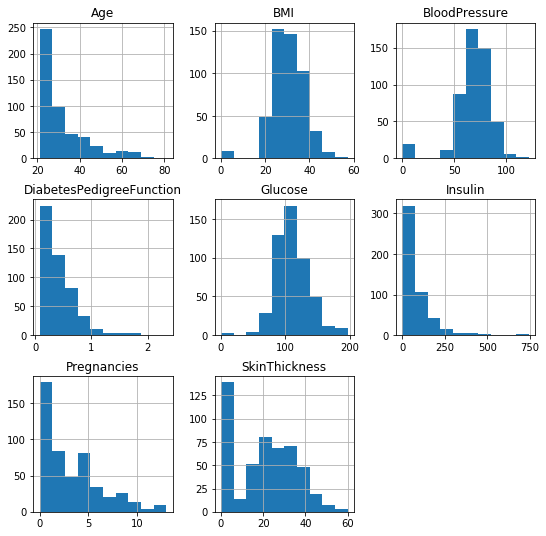

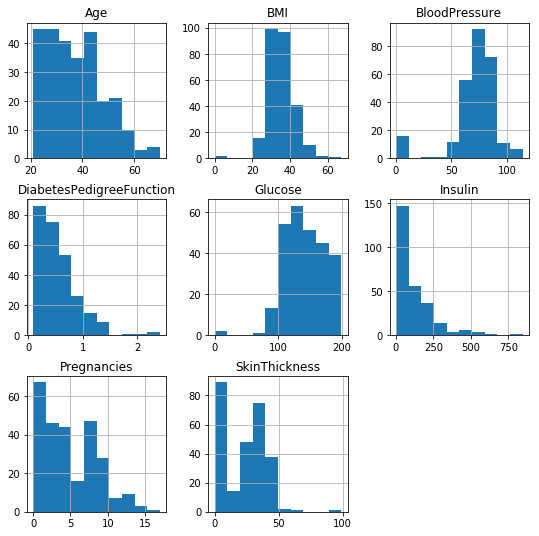

In [9]:
# Data Distribution by plotting histograms
train.groupby('Outcome').hist(figsize=(9,9))

In [10]:
# Changing the '0' values with nan as they are invalid/missing entries
train['Glucose'] = train['Glucose'].replace(0, np.nan)
train['BloodPressure'] = train['BloodPressure'].replace(0, np.nan) 
train['SkinThickness'] = train['SkinThickness'].replace(0, np.nan) 
train['Insulin'] = train['Insulin'].replace(0, np.nan)        
train['BMI'] = train['BMI'].replace(0, np.nan) 
train['DiabetesPedigreeFunction'] = train['DiabetesPedigreeFunction'].replace(0, np.nan) 
train['Age'] = train['Age'].replace(0, np.nan) 
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [11]:
# Actual missing entries in the dataset
train.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## The missing values should be replaced by 'mode' as we need the frequency here not the center most value

In [12]:
# Imputing Missing Values
train['BMI'].fillna(train['BMI'].mode().values[0], inplace=True)
train['Glucose'].fillna(train['Glucose'].mode().values[0], inplace=True)
train['BloodPressure'].fillna(train['BloodPressure'].mode().values[0], inplace=True)
train['SkinThickness'].fillna(train['SkinThickness'].mode().values[0], inplace=True)
train['Insulin'].fillna(train['Insulin'].mode().values[0], inplace=True)

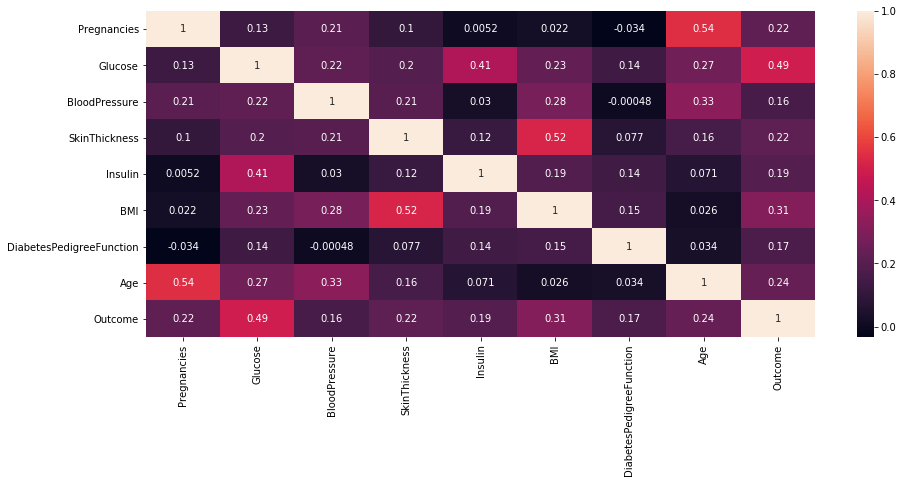

In [13]:
plt.figure(figsize= (15, 6))
sns.heatmap(train.corr(),annot=True)

In [14]:
# Feature Extraction
features=['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','BloodPressure','Age','SkinThickness']
features2=['Pregnancies','Glucose','Insulin','BMI','BloodPressure']
features3=['Glucose','BMI','Age'] #significant features

In [15]:
X=train[features3]
#columns= X.columns
y=train.Outcome

In [16]:
type(y)

pandas.core.series.Series

In [17]:
type(X)

pandas.core.frame.DataFrame

# NEW

In [18]:
# Y = train.Outcome
# x = train.drop('Outcome', axis = 1)
# columns = x.columns

In [19]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(x)
# data_x = pd.DataFrame(X, columns = columns)

# NEW

In [20]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.15, random_state = 45)

In [21]:
# from imblearn.over_sampling import SMOTE
# smt = SMOTE()
# x_train, y_train = smt.fit_sample(x_train, y_train)
# np.bincount(y_train)

In [22]:
# model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))
# #Out[95]: Accuracy of Random Forest on test set: 0.88
# print(f1_score(y_test, y_pred, average="macro"))
# print(precision_score(y_test, y_pred, average="macro"))
# print(recall_score(y_test, y_pred, average="macro"))

## Applying the Machine Learning Algorithms

# RandomForestClassifier

In [23]:
results_dict={}

In [24]:
results=[]
for i in [2,3,4,5]:
    clf = RandomForestClassifier(max_depth=i,min_samples_leaf=15,n_estimators=10)
    y_pred=cross_val_predict(clf,X,y,cv=10)
    scores= cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    results.append(sum(scores)/10)

In [25]:
results

[0.7539131920710868,
 0.7592105263157894,
 0.7643540669856459,
 0.7708988380041013]

In [26]:
results_dict['RF'] = max(results)

# XGBoost

In [27]:
results=[]
for cv in [4,5,6,7,8,9]:
    model = XGBClassifier(booster='gbtree',max_depth=5)
    model.fit(X,y)
    y_pred=cross_val_predict(model,X,y,cv=cv)
    scores= cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    results.append(sum(scores)/cv)
    print(sum(scores)/cv)

0.74609375
0.7474492827434004
0.75
0.7474442988204456
0.7408854166666667
0.7461772305821552


In [28]:
results_dict['XGB'] = max(results)

# KNN

In [29]:
results=[]
for cv in [5,10,15]:
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X,y)
    y_pred=cross_val_predict(model,X,y,cv=cv)
    scores= cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    results.append(sum(scores)/cv)
    print(sum(scores)/cv)

0.7422544775485951
0.7330314422419686
0.7318250377073906


In [30]:
results_dict['KNN'] = max(results)

# Support Vector Machine

In [31]:
cv=5
model = SVC(kernel="rbf")
y_pred=cross_val_predict(model,X,y,cv=cv)
scores= cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print('Accuracy: ',end="")
print(sum(scores)/cv)

Accuracy: 0.761768950004244


# SupportVectorMachine

In [32]:
model=SVC(kernel="linear",C=0.2)
y_pred=cross_val_predict(model,X,y,cv=5)
scores= cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(sum(scores)/cv)

0.7656565656565657


In [33]:
results_dict['SVM'] = sum(scores)/cv

# NaiveBayes

In [34]:
results=[]
for cv in [4,5,6,7]:
    model=GaussianNB()
    y_pred=cross_val_predict(model,X,y,cv=cv)
    scores= cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    results.append(sum(scores)/cv)
    print(sum(scores)/cv)

0.7708333333333334
0.7695951107715814
0.7708333333333334
0.7683307518169903


# Confusion matrix, Precision, Recall, F1 score

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
cm = confusion_matrix(y_pred, y, labels=None) #rows-actual,columns-predicted
precision = precision_score(y_pred, y, average='weighted')
recall = recall_score(y_pred, y, average='weighted')
f = (2*precision*recall)/(precision+recall)
print(cm,'\n')
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1 score: %.3f' % f)

[[430 108]
 [ 70 160]] 

Precision: 0.781
Recall: 0.768
F1 score: 0.775


In [39]:
results_dict['NB'] = max(results)

# Artificial Neural Networks

In [40]:
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [41]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()

In [42]:
X= normalizer.fit_transform(X)
X

array([[ 0.86840303,  0.16724016,  1.4259954 ],
       [-1.19914997, -0.85155088, -0.19067191],
       [ 2.01704359, -1.33183808, -0.10558415],
       ...,
       [-0.01769112, -0.90976751, -0.27575966],
       [ 0.14640039, -0.34215536,  1.17073215],
       [-0.93660356, -0.29849289, -0.87137393]])

In [43]:
## Artificial Neural Network
def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy or log loss function
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [44]:
number_of_features = len(features3)
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=50, 
                                 batch_size=20, 
                                 verbose=0)

In [45]:
y = y.as_matrix()
y

c:\users\sreeja bhattacharya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [46]:
results=[]
for cv in [5,6]:
    y_pred=cross_val_predict(neural_network, X, y, cv=cv)
    scores = cross_val_score(neural_network, X, y, cv=cv,scoring="accuracy")
    results.append(sum(scores)/cv)
results

[0.7683133859604447, 0.7682291666666666]

In [57]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_pred, y, labels=None)
# cm
# #rows-actual
# #columns-predicted

In [58]:
# from sklearn.metrics import precision_score
# precision = precision_score(y_pred, y, average='binary')
# print('Precision: %.3f' % precision)

In [56]:
results_dict['ANN'] = max(results)
results_dict['ANN']

0.7630931160342925

In [50]:
results_dict

{'RF': 0.7708988380041013,
 'XGB': 0.75,
 'KNN': 0.7422544775485951,
 'SVM': 0.7656565656565657,
 'NB': 0.7708333333333334,
 'ANN': 0.7683133859604447}

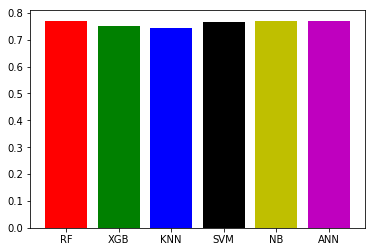

In [51]:
plt.bar(range(len(results_dict)), list(results_dict.values()), align='center',color="rgbkymc")
plt.xticks(range(len(results_dict)), list(results_dict.keys()))
plt.show()

In [52]:
# ## Artificial Neural Network
# def create_network():
    
#     # Start neural network
#     network = models.Sequential()

#     # Add fully connected layer with a ReLU activation function
#     network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

#     # Add fully connected layer with a ReLU activation function
#     #network.add(layers.Dense(units=16, activation='relu'))

#     # Add fully connected layer with a sigmoid activation function
#     network.add(layers.Dense(units=1, activation='sigmoid'))

#     # Compile neural network
#     network.compile(loss='binary_crossentropy', # Cross-entropy
#                     optimizer='rmsprop', # Root Mean Square Propagation
#                     metrics=['accuracy']) # Accuracy performance metric
    
#     # Return compiled network
#     return network